Most of the content of this file is extracted from the `example_physionet.py` file, as an excelent script to start fiddling with ECG data

In [12]:
import pandas as pd
import numpy as np
import wfdb
import ast
import matplotlib.pyplot as plt

# Initializations and useful functions

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

Stick with 100 Hz data for this test for simplicity

In [4]:
# Init
path = 'data/physionet.org/files/ptb-xl/1.0.2/'
sampling_rate=100

# Data prep

In [5]:
# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))  # to read the dictionary

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

# Data Viz

In [15]:
X_train.shape

(19603, 1000, 12)

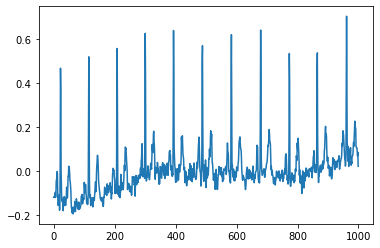

In [19]:
plt.plot(X_train[0, :, 0])

THINGS TO TRY

* Check type of Y (diagnostic_superclass), apparently in a list format
* Check usage of the 3D shape (X_train) of ECG data - How to visualize - Meaning of each dimension (1st and 2nd, 0th is just case)
* Analyze other tabular data to see next things that would be interesting to use to leverage these data